<a href="https://colab.research.google.com/github/VictorTrigo/Estadistica-Computacional/blob/master/leccion08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Análisis de Error

¿Cuántos dígitos significativos tiene el número $\hat{x}=1.41421348163$ como solución de $\sqrt{2}$?

In [ ]:
x_real = np.sqrt(2)
x_real

1.4142135623730951

In [ ]:
x_aprox = 1.41421348163
x_aprox

1.41421348163

In [ ]:
e_a = np.abs(x_real- x_aprox)
e_a

8.074309509886746e-08

In [ ]:
e_r = np.abs(x_real- x_aprox)/np.abs(x_real)
e_r

5.709399007839946e-08

In [ ]:
0.000000057

5.7e-08

In [ ]:
e_r < 10**-6/2

True

In [ ]:
def f(x):
  return x**2 - 2

In [ ]:
t = 8
epsilon = 10**(1-t)/2
f(x_aprox-epsilon)*f(x_aprox+epsilon)
# en 8 da positivo . plt tiene 7 digitos significativos

3.2155577352605514e-14

In [ ]:
# observar los 7 numeros significativos
print(x_real)
print(x_aprox)

1.4142135623730951
1.41421348163


In [ ]:
# Ejemplo del principio de Archimedes

In [ ]:
def f_arquimedes(d):
  return 2552 - 30*d**2 + d**3

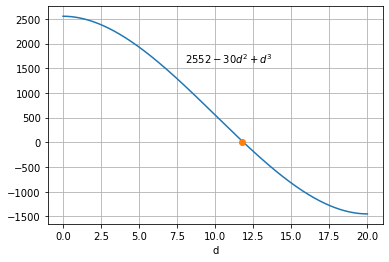

In [ ]:
d = np.linspace(0,20, 1000)
y = f_arquimedes(d)
plt.plot(d,y)
plt.xlabel('d')
plt.text(8, 1600, '$ 2552 - 30d^2 + d^3 $')
plt.grid()
plt.plot(11.75, 0, 'o')


In [ ]:
# Encontrar punto donde se hace cero

In [ ]:
# Método de la Bisección 

In [ ]:
def method_bisec(f,a,b,tol=10**(-4)):
    fa=f(a);
    fb=f(b);
    if fa==0:
        return a
    elif fb==0:
        return b
    elif fa*fb>0:
        print('no podemos asegurar que exista una raiz')
        return np.nan
    m=(a+b)/2;
    fm=f(m);
    i=0;
    while(np.abs(fm)>tol):
      if fm==0:
          return m;
      elif fa*fm<0:
          b=m;
          fb=fm;
      else: a=m;fa=fm;
            
      m=(a+b)/2;
      fm=f(m);
      i+=1;
    print('numero de iteraciones', i)
    return m 

In [ ]:
method_bisec(f_arquimedes,11,12)

numero de iteraciones 18


11.861501693725586

In [ ]:
x_solucion = method_bisec(f_arquimedes,11,12, tol=10**-8)
x_solucion

numero de iteraciones 33


11.861501508101355

In [ ]:
t = 12
epsilon = 10**(2-t)/2   # 2 en el (2-t) por que el 11 tiene 2 digitos en arriba
# Test de signos
f_arquimedes(x_solucion-epsilon)*f_arquimedes(x_solucion+epsilon)
# digitos significativos = 12

-1.792074508811147e-16

In [ ]:
def method_bisec(f,a,b,tol=10**(-4)):
    fa=f(a);
    fb=f(b);
    plt.plot([a,a],[0,fa],'-b')
    plt.plot([a,a],[0,fa],'-b')
    if fa==0:
        return a
    elif fb==0:
        return b
    elif fa*fb>0:
        print('no podemos asegurar que exista una raiz')
        return np.nan
    m=(a+b)/2;
    fm=f(m);
    
    i=0;
    while(np.abs(fm)>tol):
        plt.plot([m,m],[0,fm],'-m')
        if fm==0:
            return m;
        elif fa*fm<0:
            b=m;
            fb=fm;
        else: a=m;fa=fm;
            
        m=(a+b)/2;
        fm=f(m);
        i+=1;
    print('numero de iteraciones', i)
    return m 


numero de iteraciones 18


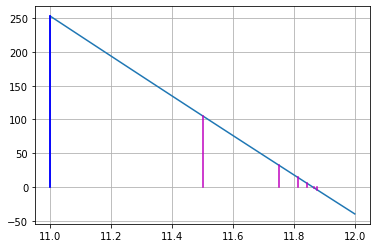

In [ ]:
d = np.linspace(11, 12, 100)
y = f_arquimedes(d)
plt.plot(d,y)
plt.grid()
x_solucion = method_bisec(f_arquimedes,11,12, tol=10**-4)

In [ ]:
# Bonus Track
# Juego de Adivina un número

In [ ]:
# computador piensa un númeeo
x_computador = np.random.randint(0,101)


In [ ]:
x_computador = np.random.randint(0,101)
x = int(input('Ingresa un numero entre 0 y 100: '))
while(x != x_computador):
  if x > x_computador:
    print('baje su numero')
  elif x < x_computador:
    print('suba su numero')
  else:
    print('el numero es correcto')
    break
  x = int(input('Ingresa un numero entre 0 y 100: '))
print('el numero es correcto')

Ingresa un numero entre 0 y 100: 3
suba su numero
Ingresa un numero entre 0 y 100: 50
suba su numero
Ingresa un numero entre 0 y 100: 75
baje su numero
Ingresa un numero entre 0 y 100: 63
baje su numero
Ingresa un numero entre 0 y 100: 57
baje su numero
Ingresa un numero entre 0 y 100: 54
suba su numero
Ingresa un numero entre 0 y 100: 55
suba su numero
Ingresa un numero entre 0 y 100: 56
el numero es correcto


In [ ]:
# Agregar contador de numer de intentos

In [ ]:
#16/04

In [ ]:
# Metodo Regula Falsi
def method_Rfalsi(f,a,b,tol=10**(-4)):
    fa=f(a);
    fb=f(b);
    if fa==0:
        return a
    elif fb==0:
        return b
    elif fa*fb>0:
        print('no podemos asegurar que exista una raiz')
    m=a-fa*(b-a)/(fb-fa)
    fm=f(m);
    i=0;
    while(np.abs(fm)>tol):
      if fm==0:
          return m;
      elif fa*fm<0:
          b=m;
          fb=fm;
      else: a=m;fa=fm;
            
      m=a-fa*(b-a)/(fb-fa)
      fm=f(m);
      i+=1;
    print('numero de iteraciones', i)
    return m 

In [ ]:
method_Rfalsi(f_arquimedes,11,12,tol=10**(-4))

numero de iteraciones 3


11.861501513388243

In [ ]:
def f_arquimedes(d):
  return 2552 - 30*d**2 + d**3
def df_f_arquimedes(d):
  return -60*d + 3*d**2

In [ ]:
def method_newton(f,df,x0,tol=10**(-12)):
  fm = f(x0)
  x = x0
  k=0
  while(np.abs(fm)>tol):
    x = x - f(x)/df(x)
    fm = f(x)
    k+=1
    if k>1000:
      print('no converge')
      break
  print('Cantidad de iteraciones: ',k)
  return x


In [ ]:
x_aprox = method_newton(f_arquimedes,df_f_arquimedes,11,tol=10**(-12))
x_aprox

Cantidad de iteraciones:  4


11.861501508120414

In [ ]:
# digitos significativos
t = 17
epsilon = 10**(2-t)/2
# test de signo
f_arquimedes(x_aprox-epsilon)*f_arquimedes(x_aprox+epsilon)

2.0679515313825692e-25

In [ ]:
# 16 D.S (cambio de signo entre 16 y 17)


In [ ]:
print("%.32f" %x_aprox)

11.86150150812041381698236364172772


In [ ]:
print("%.100f" %x_aprox)

11.8615015081204138169823636417277157306671142578125000000000000000000000000000000000000000000000000000


In [ ]:
def method_diferencias_finitas_newton(f,x0,tol=10**(-12),hk=10**-8):
  fm = f(x0)
  x = x0
  k=0
  while(np.abs(fm)>tol):
    df = (f(x+hk)-f(x))/hk
    x = x - f(x)/df
    fm = f(x)
    k+=1
    if k>1000:
      print('no converge')
      break
  print('Cantidad de iteraciones: ',k)
  return x

In [ ]:
x_aprox = method_diferencias_finitas_newton(f_arquimedes,11)
x_aprox

Cantidad de iteraciones:  4


11.861501508120412

In [ ]:
# digitos significativos
t = 16
epsilon = 10**(2-t)/2
# test de signo
f_arquimedes(x_aprox-epsilon)*f_arquimedes(x_aprox+epsilon)

-3.2570236619275465e-24

In [ ]:
def method_secante(f,x0,tol=10**(-12),hk=10**-8):
  fm = f(x0)
  x = x0
  k = 0
  while(np.abs(fm)>tol):
    df = (f(x+hk)-f(x))/hk
    x_anterior = x
    x = x - f(x)/df
    hk = x - x_anterior
    fm = f(x)
    k+=1
    if k>1000:
      print('no converge')
      break
  print('Cantidad de iteraciones: ',k)
  return x

In [ ]:
x_aprox = method_secante(f_arquimedes,11)
x_aprox

Cantidad de iteraciones:  5


11.861501508120414

In [ ]:
# digitos significativos
t = 16
epsilon = 10**(2-t)/2
# test de signo
f_arquimedes(x_aprox-epsilon)*f_arquimedes(x_aprox+epsilon)

-3.308722450212111e-24

In [ ]:
## Punto Fijo

In [ ]:
def g(x):
  return np.exp(-x)

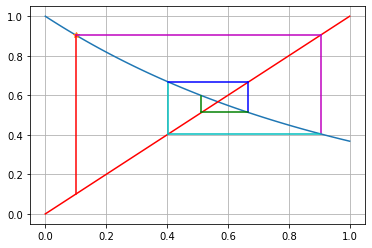

In [ ]:
x = np.linspace(0,1,100)
plt.plot(x,g(x),'-')
plt.plot(x,x,'-r')
plt.grid()
x0 = 0.1
x1 = g(x0)
plt.plot(x0,x1,'*')
x2 = g(x1)
plt.plot([x0,x0],[x0,x1],'-r')
plt.plot([x0,x1],[x1,x1],'-m')
plt.plot([x1,x1],[x1,x2],'-m')
x3 = g(x2)
plt.plot([x1,x2],[x2,x2],'-c')
plt.plot([x2,x2],[x2,x3],'-c')
x4 = g(x3)
plt.plot([x2,x3],[x3,x3],'-b')
plt.plot([x3,x3],[x3,x4],'-b')
x5 = g(x4)
plt.plot([x3,x4],[x4,x4],'-g')
plt.plot([x4,x4],[x4,x5],'-g')

In [ ]:
def g(x):
  return np.cos(x)

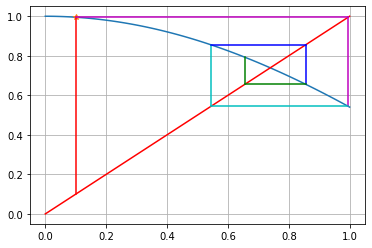

In [ ]:
x = np.linspace(0,1,100)
plt.plot(x,g(x),'-')
plt.plot(x,x,'-r')
plt.grid()
x0 = 0.1
x1 = g(x0)
plt.plot(x0,x1,'*')
x2 = g(x1)
plt.plot([x0,x0],[x0,x1],'-r')
plt.plot([x0,x1],[x1,x1],'-m')
plt.plot([x1,x1],[x1,x2],'-m')
x3 = g(x2)
plt.plot([x1,x2],[x2,x2],'-c')
plt.plot([x2,x2],[x2,x3],'-c')
x4 = g(x3)
plt.plot([x2,x3],[x3,x3],'-b')
plt.plot([x3,x3],[x3,x4],'-b')
x5 = g(x4)
plt.plot([x3,x4],[x4,x4],'-g')
plt.plot([x4,x4],[x4,x5],'-g')

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
  return x**3-2*x-5
def df(x):
  return 3*x**2-2

In [ ]:
solucion = optimize.root(f, 1, jac=df, method = 'hybr')
solucion

    fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 13
    njev: 2
     qtf: array([3.49063001e-11])
       r: array([-11.16143852])
  status: 1
 success: True
       x: array([2.09455148])

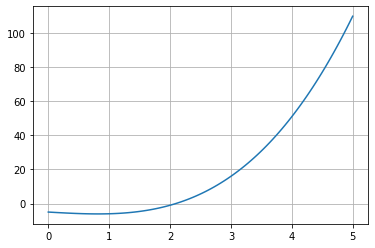

In [ ]:
x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y)
plt.grid()

In [ ]:
optimize.fsolve(f,2)

array([2.09455148])